# Imports, loading data and EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
!git clone https://github.com/slatkowski/autos_project
df = pd.read_csv('autos_project/autos.csv')

fatal: destination path 'autos_project' already exists and is not an empty directory.


In [4]:
df.head(5)

index          dateCrawled                            name  seller  \
0      0  2016-03-24 11:52:17                      Golf_3_1.6  privat   
1      1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   
2      2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   
3      3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   
4      4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   

  offerType  price abtest vehicleType  yearOfRegistration    gearbox  ...  \
0   Angebot    480   test         NaN                1993    manuell  ...   
1   Angebot  18300   test       coupe                2011    manuell  ...   
2   Angebot   9800   test         suv                2004  automatik  ...   
3   Angebot   1500   test  kleinwagen                2001    manuell  ...   
4   Angebot   3600   test  kleinwagen                2008    manuell  ...   

   model kilometer  monthOfRegistration  fuelType       brand  \
0   golf    150000                    0    benzin  volkswagen   
1    NaN    125000                    5    diesel        audi   
2  grand    125000                    8    diesel        jeep   
3   golf    150000                    6    benzin  volkswagen   
4  fabia     90000                    7    diesel       skoda   

  notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0               NaN  2016-03-24 00:00:00            0       70435   
1                ja  2016-03-24 00:00:00            0       66954   
2               NaN  2016-03-14 00:00:00            0       90480   
3              nein  2016-03-17 00:00:00            0       91074   
4              nein  2016-03-31 00:00:00            0       60437   

              lastSeen  
0  2016-04-07 03:16:57  
1  2016-04-07 01:46:50  
2  2016-04-05 12:47:46  
3  2016-03-17 17:40:17  
4  2016-04-06 10:17:21  

[5 rows x 21 columns]

In [5]:
df['index'].is_unique

True

In [6]:
df.set_index('index', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [8]:
'''Użycie metody describe z ograniczeniewm wyników do dwóch miejsc po przecinku'''

df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

price yearOfRegistration    powerPS  kilometer  \
count      371528.00          371528.00  371528.00  371528.00   
mean        17295.14            2004.58     115.55  125618.69   
std       3587953.74              92.87     192.14   40112.34   
min             0.00            1000.00       0.00    5000.00   
25%          1150.00            1999.00      70.00  125000.00   
50%          2950.00            2003.00     105.00  150000.00   
75%          7200.00            2008.00     150.00  150000.00   
max    2147483647.00            9999.00   20000.00  150000.00   

      monthOfRegistration nrOfPictures postalCode  
count           371528.00    371528.00  371528.00  
mean                 5.73         0.00   50820.67  
std                  3.71         0.00   25799.08  
min                  0.00         0.00    1067.00  
25%                  3.00         0.00   30459.00  
50%                  6.00         0.00   49610.00  
75%                  9.00         0.00   71546.00  
max                 12.00         0.00   99998.00

In [9]:
df.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [10]:
'''Wyodrębnienie 5 najpopularniejszych marek samochodów potrzebnych do modelu'''

df = df.loc[(df['brand'] == 'volkswagen') | (df['brand'] == 'bmw') | (df['brand'] == 'mercedes_benz') | (df['brand'] == 'opel') | (df['brand'] == 'audi')]

'''Ograniczenie danych do poszczególnych wartości'''

df = df[(df['yearOfRegistration'] > 1979) & (df['yearOfRegistration'] < 2023)]
df = df[(df['price'] > 499) & (df['price'] < 50000)]
df = df[(df['powerPS'] > 49) & (df['powerPS'] < 500)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188216 entries, 1 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          188216 non-null  object
 1   name                 188216 non-null  object
 2   seller               188216 non-null  object
 3   offerType            188216 non-null  object
 4   price                188216 non-null  int64 
 5   abtest               188216 non-null  object
 6   vehicleType          176623 non-null  object
 7   yearOfRegistration   188216 non-null  int64 
 8   gearbox              185508 non-null  object
 9   powerPS              188216 non-null  int64 
 10  model                182542 non-null  object
 11  kilometer            188216 non-null  int64 
 12  monthOfRegistration  188216 non-null  int64 
 13  fuelType             177816 non-null  object
 14  brand                188216 non-null  object
 15  notRepairedDamage    162024 non-nu

In [11]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148661 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          148661 non-null  object
 1   name                 148661 non-null  object
 2   seller               148661 non-null  object
 3   offerType            148661 non-null  object
 4   price                148661 non-null  int64 
 5   abtest               148661 non-null  object
 6   vehicleType          148661 non-null  object
 7   yearOfRegistration   148661 non-null  int64 
 8   gearbox              148661 non-null  object
 9   powerPS              148661 non-null  int64 
 10  model                148661 non-null  object
 11  kilometer            148661 non-null  int64 
 12  monthOfRegistration  148661 non-null  int64 
 13  fuelType             148661 non-null  object
 14  brand                148661 non-null  object
 15  notRepairedDamage    148661 non-nu

In [12]:
'''Podział postal codów na poszczególne rozmieszczenia terytorialne'''

bins = [0, 16999, 28999, 39999, 69999, 89999]

df['postalCode'] = pd.cut(df['postalCode'], bins=bins,
       labels=['Eastern', 'Northern', 'Central', 'Western', 'Southern'])

df['postalCode'].fillna('Central', inplace=True)
df['postalCode']

index
3          Central
5          Central
11         Western
19         Western
20        Southern
            ...   
371512     Central
371516     Western
371517    Southern
371525    Southern
371527    Southern
Name: postalCode, Length: 148661, dtype: category
Categories (5, object): ['Eastern' < 'Northern' < 'Central' < 'Western' < 'Southern']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_list = ['gearbox', 'vehicleType', 'notRepairedDamage', 'fuelType', 'postalCode']

for i in encode_list:
    df[i] = le.fit_transform(df[i])
    print(df[i].name)
    print(le.classes_)
    print(np.unique(df[i]))
    print('__________')

gearbox
['automatik' 'manuell']
[0 1]
__________
vehicleType
['andere' 'bus' 'cabrio' 'coupe' 'kleinwagen' 'kombi' 'limousine' 'suv']
[0 1 2 3 4 5 6 7]
__________
notRepairedDamage
['ja' 'nein']
[0 1]
__________
fuelType
['andere' 'benzin' 'cng' 'diesel' 'elektro' 'hybrid' 'lpg']
[0 1 2 3 4 5 6]
__________
postalCode
['Central' 'Eastern' 'Northern' 'Southern' 'Western']
[0 1 2 3 4]
__________


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148661 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          148661 non-null  object
 1   name                 148661 non-null  object
 2   seller               148661 non-null  object
 3   offerType            148661 non-null  object
 4   price                148661 non-null  int64 
 5   abtest               148661 non-null  object
 6   vehicleType          148661 non-null  int32 
 7   yearOfRegistration   148661 non-null  int64 
 8   gearbox              148661 non-null  int32 
 9   powerPS              148661 non-null  int64 
 10  model                148661 non-null  object
 11  kilometer            148661 non-null  int64 
 12  monthOfRegistration  148661 non-null  int64 
 13  fuelType             148661 non-null  int32 
 14  brand                148661 non-null  object
 15  notRepairedDamage    148661 non-nu

In [15]:
df['brand'].value_counts()

volkswagen       49324
bmw              28718
mercedes_benz    24835
audi             23432
opel             22352
Name: brand, dtype: int64

In [16]:
'''Zbalansowanie klas na zasadzie ograniczenia liczebności każdej z najpopularnijszych marek do liczby tej najmniej licznej.'''

min_cnt = df['brand'].value_counts().min()
df = df.groupby('brand').sample(min_cnt)

df['brand'].value_counts()

audi             22352
bmw              22352
mercedes_benz    22352
opel             22352
volkswagen       22352
Name: brand, dtype: int64

In [17]:
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

price vehicleType yearOfRegistration    gearbox    powerPS  \
count  111760.00   111760.00          111760.00  111760.00  111760.00   
mean     7686.26        4.60            2003.56       0.69     145.51   
std      7743.83        1.67               5.83       0.46      60.88   
min       500.00        0.00            1980.00       0.00      50.00   
25%      2100.00        4.00            2000.00       0.00     102.00   
50%      4995.00        5.00            2004.00       1.00     140.00   
75%     10500.00        6.00            2008.00       1.00     177.00   
max     49999.00        7.00            2017.00       1.00     489.00   

       kilometer monthOfRegistration   fuelType notRepairedDamage  \
count  111760.00           111760.00  111760.00         111760.00   
mean   128113.50                6.31       1.87              0.92   
std     37381.75                3.44       1.10              0.27   
min      5000.00                0.00       0.00              0.00   
25%    125000.00                3.00       1.00              1.00   
50%    150000.00                6.00       1.00              1.00   
75%    150000.00                9.00       3.00              1.00   
max    150000.00               12.00       6.00              1.00   

      nrOfPictures postalCode  
count    111760.00  111760.00  
mean          0.00       2.41  
std           0.00       1.56  
min           0.00       0.00  
25%           0.00       1.00  
50%           0.00       3.00  
75%           0.00       4.00  
max           0.00       4.00

In [18]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [19]:
'''Wyrzucenie poszczególnych cech z modelu.'''

df.drop(columns=['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'model', 'monthOfRegistration',
       'dateCreated', 'nrOfPictures', 'lastSeen'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111760 entries, 13889 to 338388
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               111760 non-null  int64 
 1   vehicleType         111760 non-null  int32 
 2   yearOfRegistration  111760 non-null  int64 
 3   gearbox             111760 non-null  int32 
 4   powerPS             111760 non-null  int64 
 5   kilometer           111760 non-null  int64 
 6   fuelType            111760 non-null  int32 
 7   brand               111760 non-null  object
 8   notRepairedDamage   111760 non-null  int32 
 9   postalCode          111760 non-null  int32 
dtypes: int32(5), int64(4), object(1)
memory usage: 7.2+ MB


In [20]:
report = ProfileReport(df, infer_dtypes=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
pivot = pd.pivot_table(df, index='brand', values = ['price', 'vehicleType', 'yearOfRegistration',
                                                      'gearbox', 'powerPS', 'fuelType',
                                                      'notRepairedDamage', 'kilometer', 'postalCode'], 
                       aggfunc= [np.mean, np.median, np.std])
pd.options.display.max_columns = None
display(pivot)

mean                                                        \
               fuelType   gearbox      kilometer notRepairedDamage postalCode   
brand                                                                           
audi           2.059681  0.642180  127346.769864          0.917949   2.309726   
bmw            1.910030  0.637706  131915.712241          0.924213   2.487026   
mercedes_benz  2.000671  0.414549  129999.776306          0.924660   2.497092   
opel           1.530870  0.890972  125650.501074          0.900814   2.524741   
volkswagen     1.863010  0.842609  125654.751253          0.921305   2.246734   

                                                                        \
                  powerPS         price vehicleType yearOfRegistration   
brand                                                                    
audi           167.621734  10067.042457    4.986310        2004.587106   
bmw            176.071045   9207.908062    4.995258        2003.595920   
mercedes_benz  166.805073   8876.384664    4.616276        2002.783644   
opel           105.691840   3808.979420    4.137795        2003.280378   
volkswagen     111.338762   6471.000805    4.274606        2003.538073   

                median                                                         \
              fuelType gearbox kilometer notRepairedDamage postalCode powerPS   
brand                                                                           
audi                 3       1    150000                 1          3     160   
bmw                  1       1    150000                 1          3     170   
mercedes_benz        1       0    150000                 1          3     156   
opel                 1       1    150000                 1          3     101   
volkswagen           1       1    150000                 1          3     105   

                                                         std            \
              price vehicleType yearOfRegistration  fuelType   gearbox   
brand                                                                    
audi           7500           5               2005  1.101741  0.479370   
bmw            6980           6               2004  1.128575  0.480674   
mercedes_benz  5990           5               2003  1.156591  0.492655   
opel           2450           4               2003  1.009655  0.311682   
volkswagen     4200           5               2004  1.041713  0.364177   

                                                                     \
                  kilometer notRepairedDamage postalCode    powerPS   
brand                                                                 
audi           39246.872441          0.274448   1.570339  58.749173   
bmw            34065.182134          0.264664   1.554093  55.206927   
mercedes_benz  35760.104383          0.263945   1.524410  62.047438   
opel           37830.547984          0.298918   1.567138  38.668663   
volkswagen     39316.928798          0.269269   1.580187  45.394461   

                                                           
                     price vehicleType yearOfRegistration  
brand                                                      
audi           8942.702225    1.229181           5.824627  
bmw            8191.274005    1.473363           5.646366  
mercedes_benz  8352.021424    1.838957           6.208283  
opel           3898.345983    1.682556           5.140398  
volkswagen     6473.903374    1.862824           6.130278

**Modelowanie.**

In [22]:
X = df.drop(columns='brand')
y = df['brand']

In [23]:
X.sample(5)

price  vehicleType  yearOfRegistration  gearbox  powerPS  kilometer  \
df_index                                                                        
233286      600            5                2000        1      101     150000   
259074    17800            1                2006        0      174     150000   
32735     20500            3                2009        0      231     125000   
159270     5990            1                2006        0      117     150000   
173021    11500            6                2008        1      160     100000   

          fuelType  notRepairedDamage  postalCode  
df_index                                           
233286           3                  1           0  
259074           3                  1           1  
32735            3                  1           4  
159270           6                  1           4  
173021           1                  1           2

In [24]:
y.sample(5)

df_index
277644             audi
35987              audi
90404              audi
38042              opel
82869     mercedes_benz
Name: brand, dtype: object

In [25]:
brands = list(np.unique(y))
brands

['audi', 'bmw', 'mercedes_benz', 'opel', 'volkswagen']

In [26]:
X.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'kilometer', 'fuelType', 'notRepairedDamage', 'postalCode'],
      dtype='object')

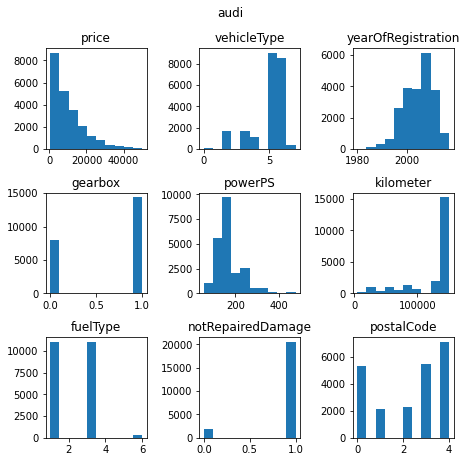

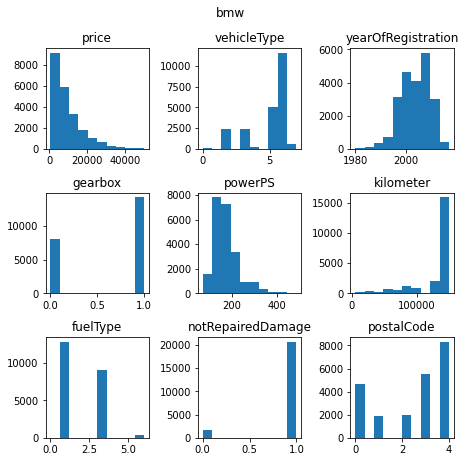

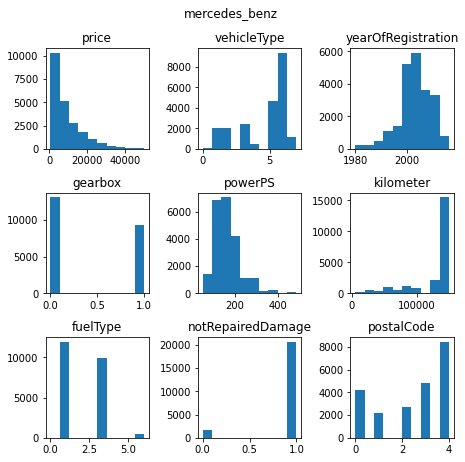

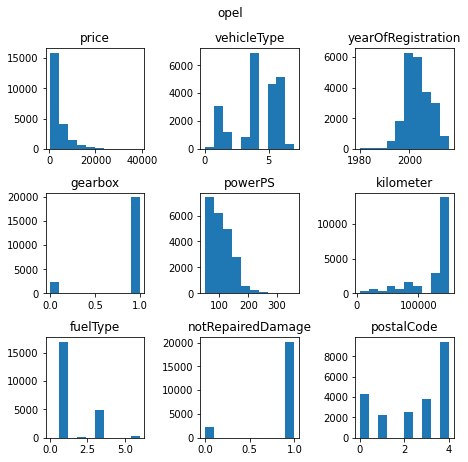

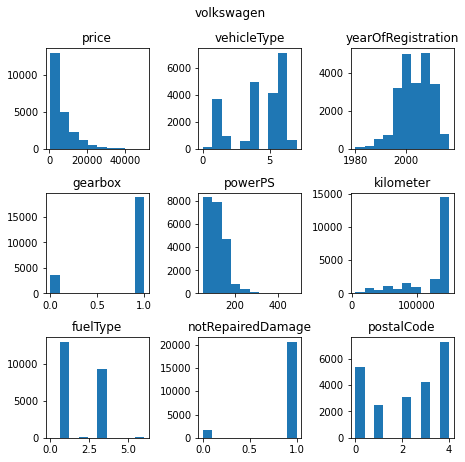

In [27]:
for brand in brands:
    df[df['brand']==brand][X.columns].hist(figsize=(6.5,6.5), grid=False)
    plt.suptitle(brand)
    plt.tight_layout()

In [28]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4])

## Split dataset with train_test_split

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify=y_train)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (67056, 9)
X_val shape: (22352, 9)
X_test shape: (22352, 9)
y_train shape: (67056,)
y_val shape: (22352,)
y_test shape: (22352,)


# RandomForestCassifier

## #1 Model

### Train model

In [30]:
model = RandomForestClassifier(max_features = None)

params = {'max_depth': [14, 15, 16], 
            'min_samples_split': [5, 10]}

gs = GridSearchCV(estimator = model, param_grid = params, cv = 10)

gs.fit(X_train, y_train)

model.fit(X_train, y_train)
pred = model.predict(X_train)

print(classification_report(y_train, pred))
print(f'Best score:', {gs.best_score_})
print(f'Best estimator:', {gs.best_estimator_})

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13411
           1       1.00      1.00      1.00     13411
           2       1.00      1.00      1.00     13412
           3       0.99      0.99      0.99     13411
           4       0.99      0.99      0.99     13411

    accuracy                           0.99     67056
   macro avg       0.99      0.99      0.99     67056
weighted avg       0.99      0.99      0.99     67056

Best score: {0.8042979396949498}
Best estimator: {RandomForestClassifier(max_depth=16, max_features=None, min_samples_split=5)}


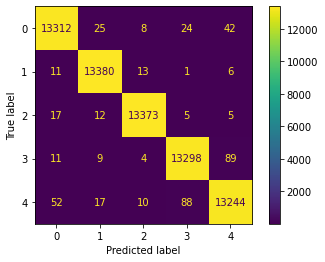

In [31]:
cm = confusion_matrix(y_train, pred, labels = model.classes_)

viz = ConfusionMatrixDisplay(confusion_matrix = cm, 
                            display_labels = model.classes_)

viz.plot()
plt.show()

### Validation model

In [32]:
val_pred = model.predict(X_val)

print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4470
           1       0.82      0.84      0.83      4471
           2       0.84      0.82      0.83      4470
           3       0.84      0.85      0.85      4470
           4       0.74      0.73      0.74      4471

    accuracy                           0.80     22352
   macro avg       0.80      0.80      0.80     22352
weighted avg       0.80      0.80      0.80     22352



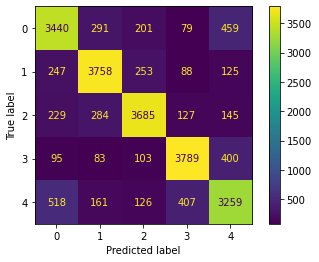

In [33]:
cm_val = confusion_matrix(y_val, val_pred, labels = model.classes_)

viz = ConfusionMatrixDisplay(confusion_matrix = cm_val, 
                            display_labels = model.classes_)

viz.plot()
plt.show()

## #2 Model

### Train model

In [34]:
model_2 = RandomForestClassifier()

params_2 = {'max_depth': [14, 15, 16],
            'min_samples_split': [4, 5, 6]}

gs_2 = GridSearchCV(estimator = model_2, param_grid = params, cv = 10)

gs_2.fit(X_train, y_train)

model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_train)

print(classification_report(y_train, pred_2))
print(f'Best score:', {gs_2.best_score_})
print(f'Best estimator:', {gs_2.best_estimator_})

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13411
           1       1.00      1.00      1.00     13411
           2       1.00      1.00      1.00     13412
           3       0.99      0.99      0.99     13411
           4       0.99      0.99      0.99     13411

    accuracy                           0.99     67056
   macro avg       0.99      0.99      0.99     67056
weighted avg       0.99      0.99      0.99     67056

Best score: {0.7814365222814033}
Best estimator: {RandomForestClassifier(max_depth=16, min_samples_split=5)}


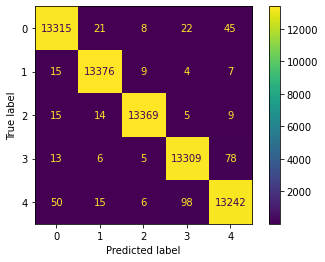

In [35]:
cm_2 = confusion_matrix(y_train, pred_2, labels = model_2.classes_)

viz = ConfusionMatrixDisplay(confusion_matrix = cm_2, 
                            display_labels = model_2.classes_)

viz.plot()
plt.show()

### Validation model

In [36]:
val_pred_2 = model_2.predict(X_val)

print(classification_report(y_val, val_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4470
           1       0.79      0.82      0.81      4471
           2       0.82      0.81      0.81      4470
           3       0.84      0.85      0.84      4470
           4       0.75      0.72      0.74      4471

    accuracy                           0.79     22352
   macro avg       0.79      0.79      0.79     22352
weighted avg       0.79      0.79      0.79     22352



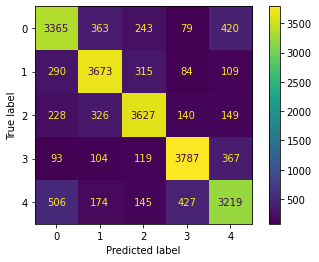

In [37]:
cm_2_val = confusion_matrix(y_val, val_pred_2, labels = model_2.classes_)

viz = ConfusionMatrixDisplay(confusion_matrix = cm_2_val, 
                            display_labels = model_2.classes_)

viz.plot()
plt.show()

## Test model

In [ ]:
model = RandomForestClassifier(max_depth = 16, min_samples_split = 5)

